<a href="https://colab.research.google.com/github/shsaniya04/Machine-Learning-Projects/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Displays the first 5 rows of the DataFrame.
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#Displays the last 5 rows of the DataFrame
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
#Returns the number of rows and columns as a tuple.
df.shape


(53940, 11)

In [ ]:
#Generates descriptive statistics for numerical columns.
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# checking for null values
print(df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [ ]:
#Provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of object (categorical) columns
categorical_cols = ['cut', 'color', 'clarity']

# Initialize the LabelEncoder
label_enc = LabelEncoder()

# Apply LabelEncoder to each column in the original DataFrame
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Verify the transformation
print(df.head())
print(df.info())

   Unnamed: 0  carat  cut  color  clarity  depth  table  price     x     y  \
0           1   0.23    2      1        3   61.5   55.0    326  3.95  3.98   
1           2   0.21    3      1        2   59.8   61.0    326  3.89  3.84   
2           3   0.23    1      1        4   56.9   65.0    327  4.05  4.07   
3           4   0.29    3      5        5   62.4   58.0    334  4.20  4.23   
4           5   0.31    1      6        3   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int64  
 3   color       53940 non-null  int64  
 4   clarity     53940 non-null  int64  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  f

In [ ]:
x = df.drop(['price','x','y','z','depth','table'], axis=1)
y = df['price']


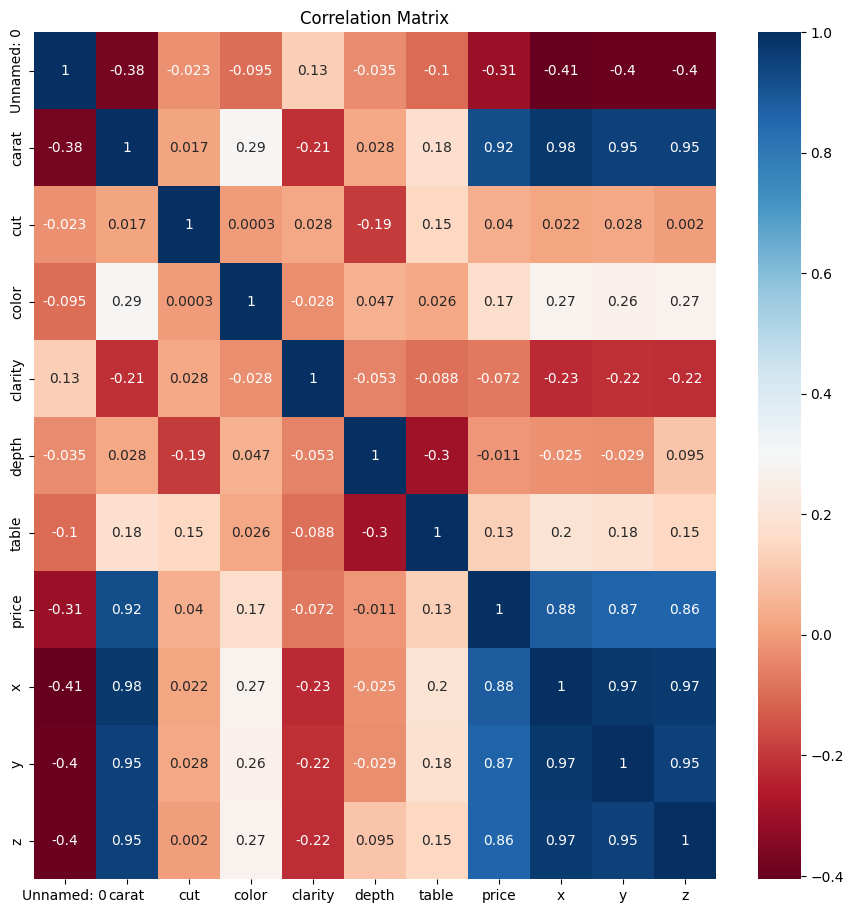

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

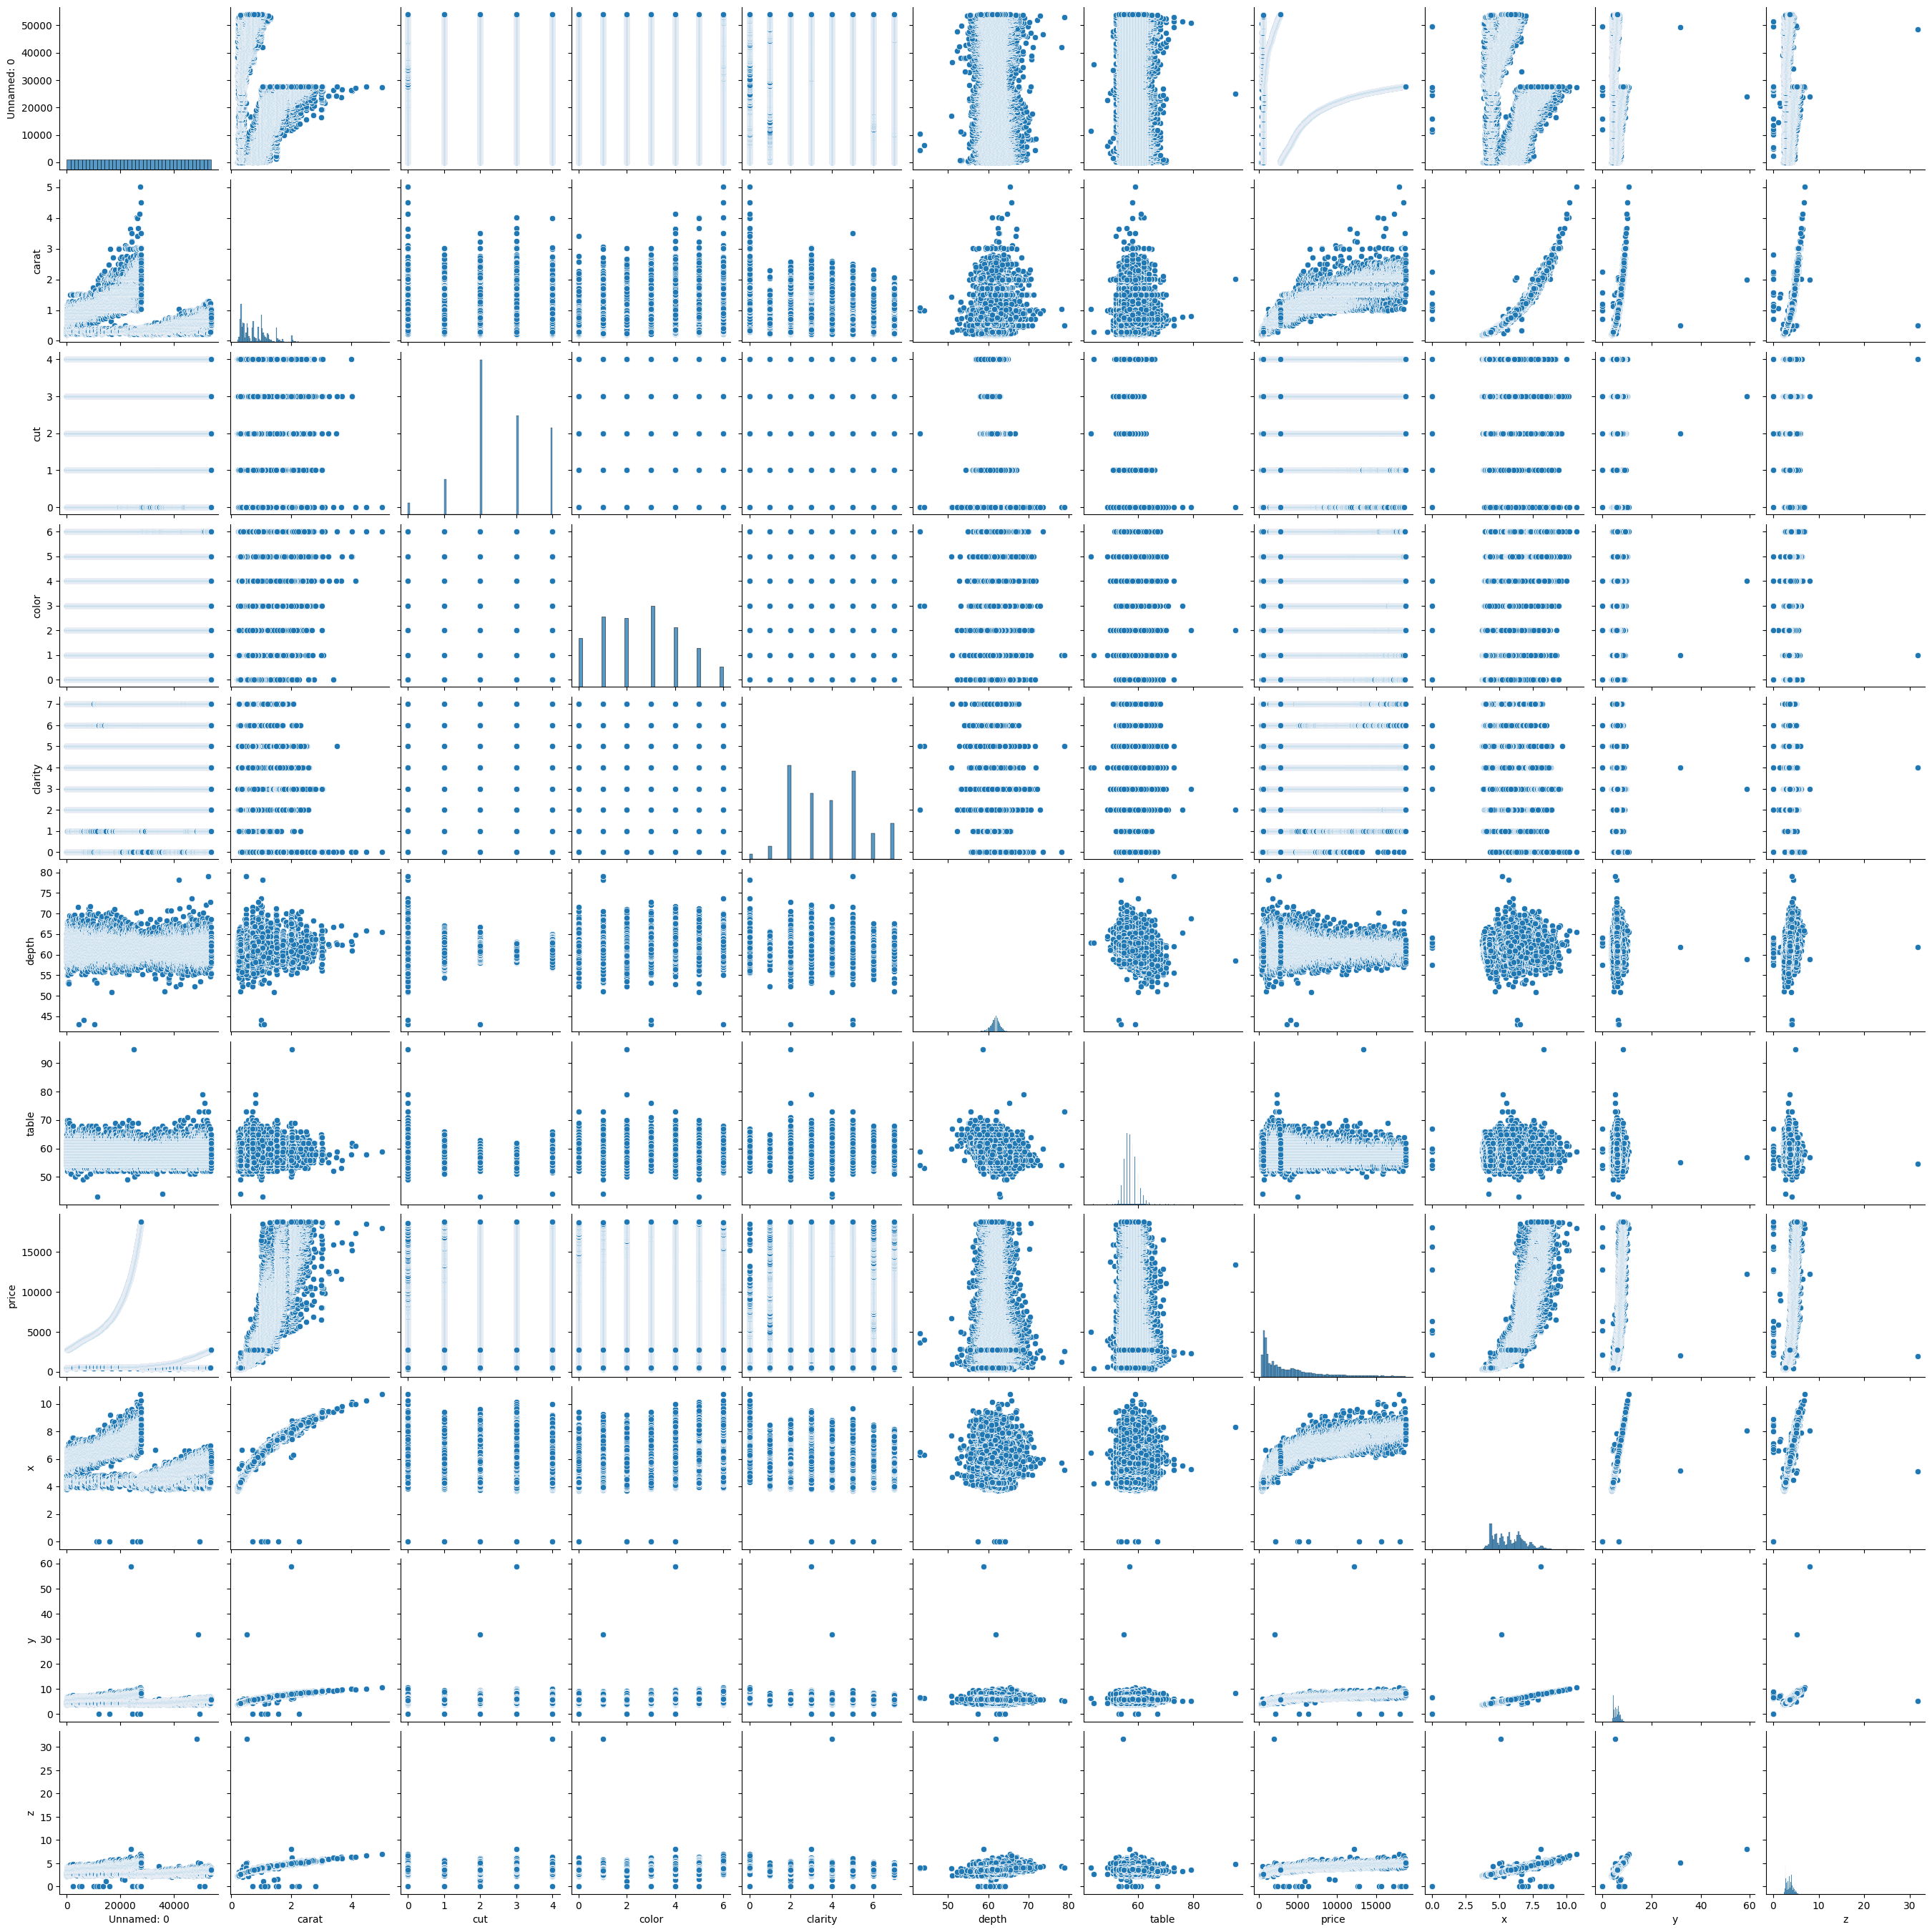

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0  Unnamed: 0  3.472321
1       carat  3.660699
2         cut  5.388579
3       color  3.497426
4     clarity  4.722612


In [ ]:
print(x.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity'], dtype='object')


<ipython-input-25-036e8e53053e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'])


<Axes: xlabel='carat', ylabel='Density'>

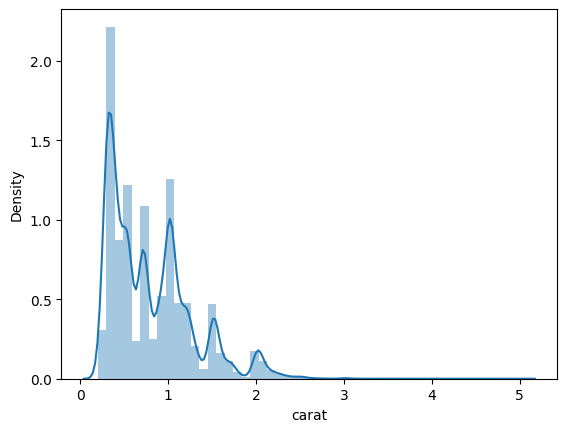

In [ ]:
sns.distplot(df['carat'])

<ipython-input-26-95a30a134d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cut'])


<Axes: xlabel='cut', ylabel='Density'>

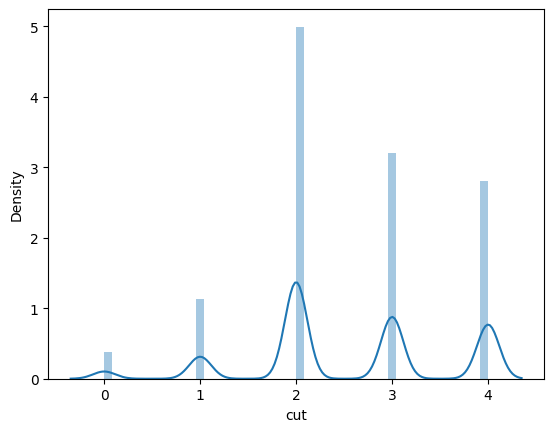

In [ ]:
sns.distplot(df['cut'])

<ipython-input-27-f4b202324ad8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['color'])


<Axes: xlabel='color', ylabel='Density'>

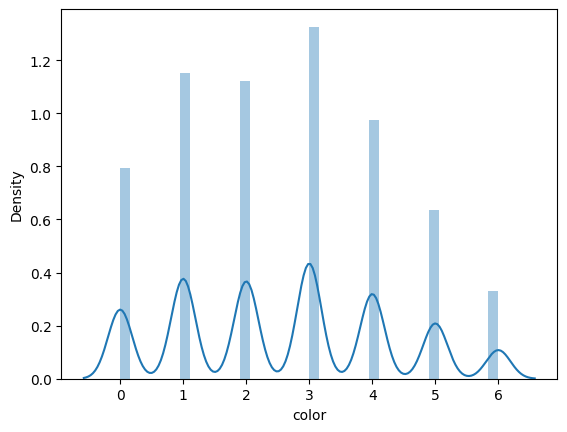

In [ ]:
sns.distplot(df['color'])

<ipython-input-28-af85e3461c53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['clarity'])


<Axes: xlabel='clarity', ylabel='Density'>

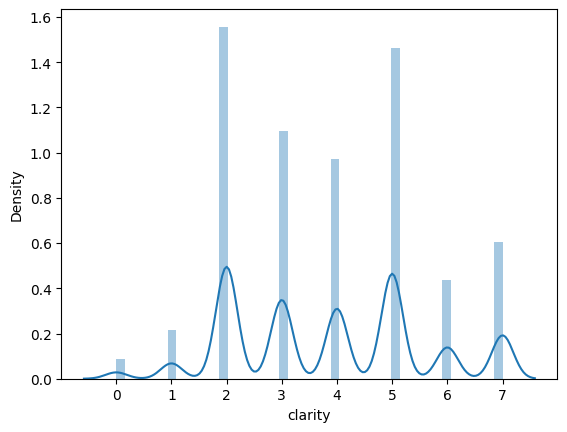

In [ ]:
sns.distplot(df['clarity'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# normalizing the data using Standard Scaler(zero mean, unit variance scaling)
scaler = StandardScaler()
# fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)
# transform the test data
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.02968631,  2.56005606, -1.51451263, -0.3479487 , -0.48350433],
       [-1.14661377,  0.44739205,  1.40673934, -0.93662126, -0.48350433],
       [-0.82721633,  0.63753181,  0.43298868,  0.82939642,  0.675971  ],
       ...,
       [ 0.7162596 , -0.98921948,  1.40673934, -0.3479487 , -1.64297965],
       [-1.67973512,  0.21499901,  0.43298868,  2.00674153, -1.06324199],
       [-0.72032225,  0.72203837,  0.43298868, -0.3479487 , -1.06324199]])

In [ ]:
x_test_scaled

array([[-1.6458168 , -1.17935924, -0.54076197,  0.24072386,  1.25570866],
       [ 1.48032097, -0.46105347,  1.40673934, -0.3479487 ,  1.83544632],
       [ 0.94026178, -0.841333  , -0.54076197, -0.93662126,  1.83544632],
       ...,
       [ 0.28052492, -1.03147276, -1.51451263,  0.24072386,  1.25570866],
       [-0.33636439,  0.91217813, -0.54076197, -0.3479487 ,  0.09623334],
       [-1.41391319,  0.59527853, -1.51451263,  2.00674153, -0.48350433]])

In [ ]:
# Creating and training the Linear Regresion Model
model = LinearRegression()
# Train the model on the scaled data
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predicting the target values for both training and testing sets
# Predictions for training set
# y_pred_train model.predict(X_train_scaled)
# Predictions for test set
y_pred_test = model.predict(x_test_scaled)

In [ ]:
# Calculating R-squared scores (how well the model explains the variance in data)
r2_test = r2_score(y_test, y_pred_test) #R-squared for test set

In [ ]:
# Calculating Root Mean Squared Error (RMSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_test)  # Mean squared error
rmse_test = mse_test ** 0.5  # Root mean squared error

In [ ]:
#Printing the performance metrics
print("R-squared:", r2_test)
print("Root Mean Squared Error:", rmse_test)

R-squared: 0.8796347766891011
Root Mean Squared Error: 1383.2658688460267


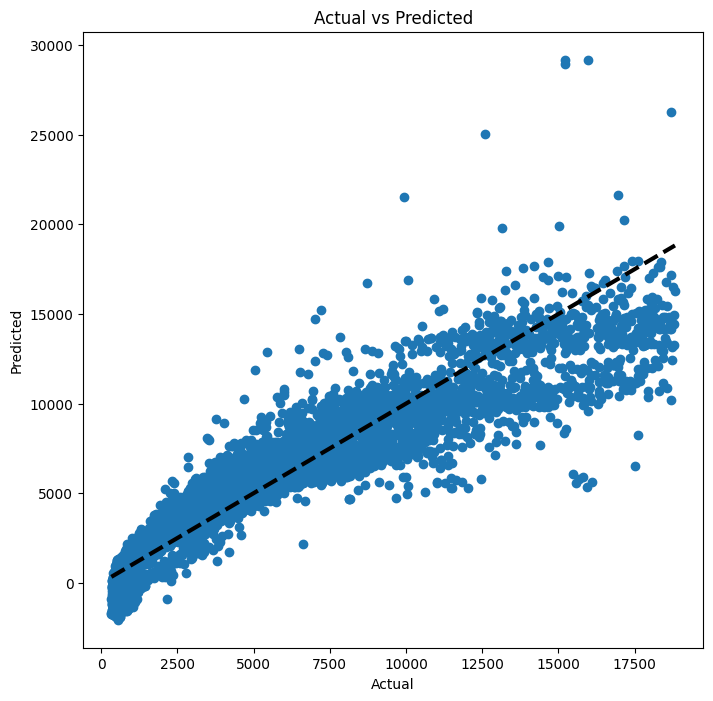

In [ ]:
#Plotting Residual (actual vs predicted values)
plt.figure(figsize=(8, 8))
plt.scatter (y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.intercept_

3939.490707267334

In [ ]:
model.coef_

array([ 170.17375525, 3983.28869484,   80.18856692, -446.06935971,
        528.10632721])

In [ ]:
model.score(x_train_scaled,y_train)

0.8789038436614146

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
#LinearRegression mean cross-validation
lm=LinearRegression()
lm.fit(x_train, y_train)
cv=cross_val_score(lm, x_train,y_train,cv=5)
print('LinearRegression')
print(mean(cv))

LinearRegression
0.8788641825106163


In [ ]:
#RandomForestRegressor mean cross-validation
rf=RandomForestRegressor(random_state = 1)
rf.fit(x_train, y_train)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print('Random Forest Regressor')
print(mean (cv))

Random Forest Regressor
0.9999230518450292


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred_dtr = dtr.predict(x_test)
r2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",r2_score_dtr,"%")

R2 Score :  100.0 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_score_rf = round(r2_score(y_pred_rf,y_test) * 100, 2)
print('R2 Score : ',r2_score_rf,'%')

R2 Score :  100.0 %
